# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os
import random
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight



Load the dataset.

In [ ]:
!pip install -U gdown

In [ ]:
!gdown --id 1oY0-04QvywH3lWdbd8M624qOjU-1uggu --output waste_data.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1oY0-04QvywH3lWdbd8M624qOjU-1uggu
From (redirected): https://drive.google.com/uc?id=1oY0-04QvywH3lWdbd8M624qOjU-1uggu&confirm=t&uuid=d1071075-572c-420d-9b57-93db8353f9ae
To: /content/waste_data.zip
100% 498M/498M [00:10<00:00, 46.2MB/s]


In [ ]:
# Unzip the file
import zipfile

with zipfile.ZipFile("waste_data.zip", 'r') as zip_ref:
    zip_ref.extractall("waste_data")

print("✅ Extracted to: waste_data")

✅ Extracted to: waste_data


In [ ]:
import os

for root, dirs, files in os.walk("waste_data"):
    print("📁", root)
    for d in dirs:
        print(" └──", d)
    for f in files[:5]:
        print("     📄", f)
    print()

📁 waste_data
 └── waste_data

📁 waste_data/waste_data
 └── Food_Waste
 └── Metal
 └── Paper
 └── Cardboard
 └── Other
 └── Glass
 └── Plastic

📁 waste_data/waste_data/Food_Waste
     📄 file_677.png
     📄 file_477.png
     📄 file_578.png
     📄 file_276.png
     📄 file_344.png

📁 waste_data/waste_data/Metal
     📄 file_677.png
     📄 file_477.png
     📄 file_578.png
     📄 file_276.png
     📄 file_344.png

📁 waste_data/waste_data/Paper
     📄 file_677.png
     📄 file_477.png
     📄 file_578.png
     📄 file_276.png
     📄 file_344.png

📁 waste_data/waste_data/Cardboard
     📄 file_477.png
     📄 file_276.png
     📄 file_344.png
     📄 file_42.png
     📄 file_451.png

📁 waste_data/waste_data/Other
     📄 file_677.png
     📄 file_477.png
     📄 file_578.png
     📄 file_276.png
     📄 file_344.png

📁 waste_data/waste_data/Glass
     📄 file_677.png
     📄 file_477.png
     📄 file_578.png
     📄 file_276.png
     📄 file_344.png

📁 waste_data/waste_data/Plastic
     📄 file_1562.png
     📄 fil

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
# Create a function to load the raw images

def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Ensure consistent class order

    for label_index, class_name in enumerate(class_names):
        class_folder = os.path.join(folder, class_name)

        if not os.path.isdir(class_folder):
            continue  # skip non-folder files

        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            if os.path.isfile(img_path):
                try:
                    img = tf.keras.utils.load_img(img_path, color_mode='rgb', target_size=(64, 64))
                    img_array = tf.keras.utils.img_to_array(img)
                    images.append(img_array)
                    labels.append(label_index)  # Numeric label
                except Exception as e:
                    print(f"Failed to load {img_path}: {e}")

    return np.array(images), np.array(labels), class_names


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
# Get the images and their labels

import os
import tensorflow as tf

image_data_dir = 'waste_data/waste_data'  # Folder containing class folders

X, y, class_names = load_images_from_folder(image_data_dir)

print("✅ Loaded dataset")
print(f"Total images: {len(X)}")
print(f"Image shape: {X.shape[1:]}")
print(f"Number of classes: {len(class_names)}")
print(f"Classes: {class_names}")

✅ Loaded dataset
Total images: 7625
Image shape: (64, 64, 3)
Number of classes: 7
Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

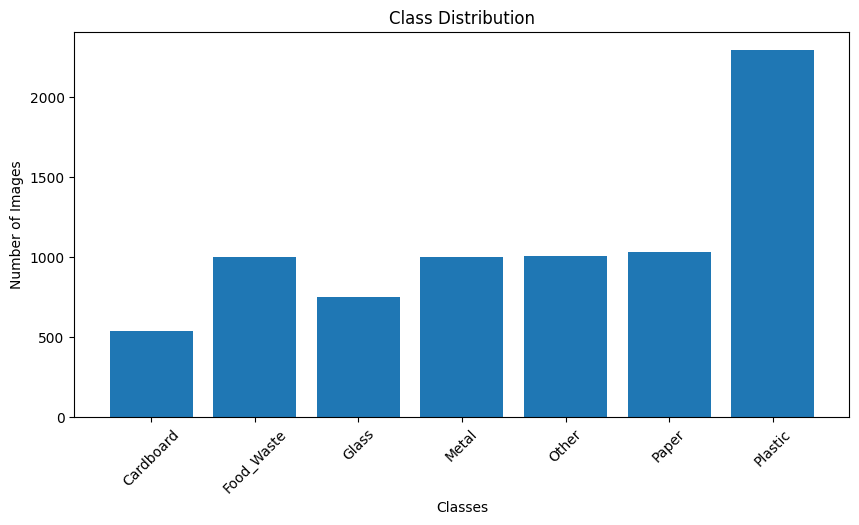

In [ ]:
# Visualise Data Distribution

def plot_class_distribution(labels, class_names):
    unique, counts = np.unique(labels, return_counts=True)
    class_counts = dict(zip(unique, counts))

    plt.figure(figsize=(10, 5))
    plt.bar(class_names, [class_counts.get(i, 0) for i in range(len(class_names))])
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(y, class_names)

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

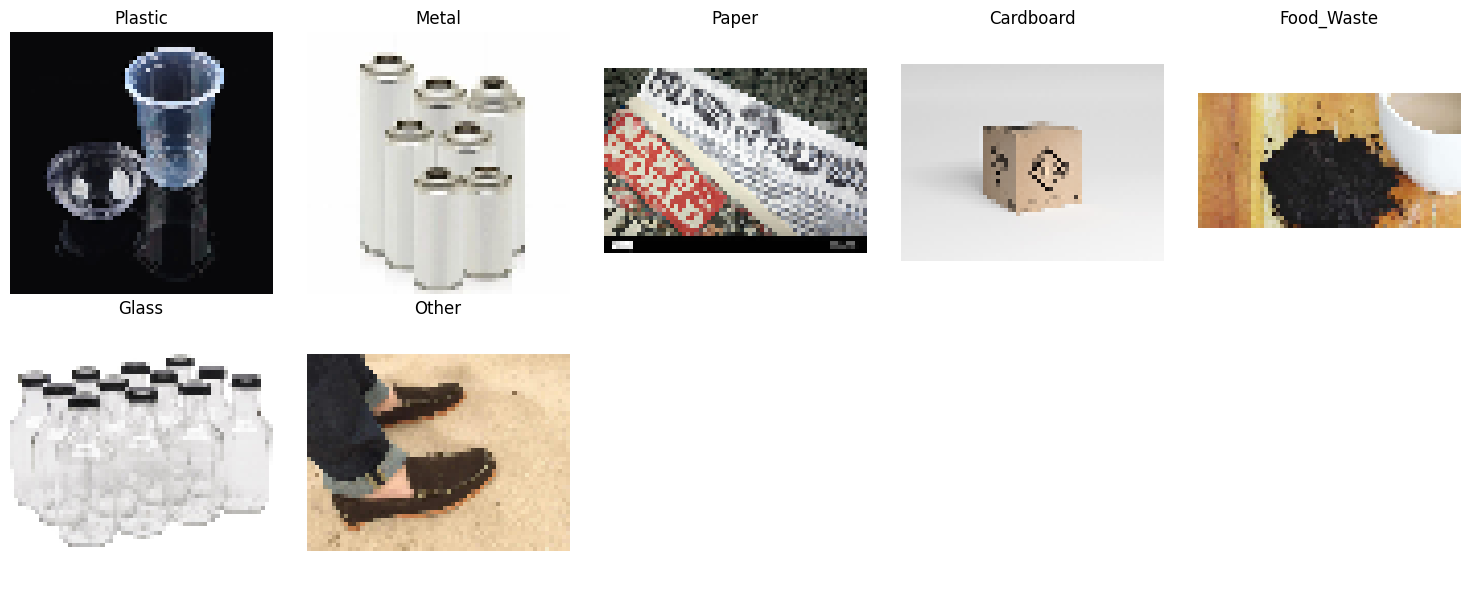

In [ ]:
# Visualise Sample Images (across different labels)

def plot_sample_images(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 6))
    unique_labels = np.unique(labels)
    selected_labels = random.sample(list(unique_labels), min(len(unique_labels), num_samples))

    for i, label in enumerate(selected_labels):
        idxs = np.where(labels == label)[0]
        sample_idx = random.choice(idxs)
        img = images[sample_idx]

        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(img.astype('uint8'))
        plt.title(class_names[label])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_sample_images(X, y, class_names, num_samples=10)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set

def find_image_dimensions(images):
    min_height = min_width = float('inf')
    max_height = max_width = 0

    for img in images:
        height, width = img.shape[:2]
        min_height = min(min_height, height)
        min_width = min(min_width, width)
        max_height = max(max_height, height)
        max_width = max(max_width, width)

    return (min_height, min_width), (max_height, max_width)

min_dims, max_dims = find_image_dimensions(X)

print(f"📏 Smallest Image Dimensions: {min_dims}")
print(f"📐 Largest Image Dimensions: {max_dims}")

📏 Smallest Image Dimensions: (64, 64)
📐 Largest Image Dimensions: (64, 64)


In [ ]:
import tensorflow as tf
import numpy as np

def resize_images_in_batches(images, target_size=(64, 64), batch_size=1000):
    resized_images = []
    for i in range(0, len(images), batch_size):
        batch = images[i:i+batch_size]
        batch_resized = tf.image.resize(batch, target_size)
        resized_images.append(batch_resized.numpy())
    return np.concatenate(resized_images, axis=0)

X_resized = resize_images_in_batches(X, target_size=(64, 64))
print(f"✅ Resized image shape: {X_resized.shape}")

✅ Resized image shape: (7625, 64, 64, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Optional: create a mapping dictionary
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(f"✅ Encoded labels shape: {y_encoded.shape}")
print("🔤 Label mapping:")
for k, v in label_map.items():
    print(f"  {k}: {v}")


✅ Encoded labels shape: (7625,)
🔤 Label mapping:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Improving Accuracy
X_resized = X_resized / 255.0  # Normalization

In [ ]:
# Assign specified parts of the dataset to train and validation sets


X_train, X_val, y_train, y_val = train_test_split(
    X_resized, y_encoded,
    test_size=0.2,
    stratify=y_encoded,  # 🔥 ensures class balance
    random_state=42
)

print(f"✅ Training shape: {X_train.shape}, Validation shape: {X_val.shape}")

✅ Training shape: (6100, 64, 64, 3), Validation shape: (1525, 64, 64, 3)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
# Build and compile the model
def build_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),

        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),



        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


    return model

input_shape = (64, 64, 3)  # 3 channel since RGB
num_classes = len(class_names)
model = build_model(input_shape, num_classes)
# Summary of the architecture
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,118,471 (8.08 MB)

 Trainable params: 2,118,023 (8.08 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=len(class_names))
y_val_cat = to_categorical(y_val, num_classes=len(class_names))

In [ ]:
#Improve Accuracy

#Define the data augmentation generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training

# Use integer labels for class weight calculation
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)
class_weights = dict(enumerate(class_weights))


def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


    history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=32),
    validation_data=(X_val, y_val_cat),
    epochs=20,
    callbacks=[early_stop],
    class_weight=class_weights
)
    return history

# Train the model with early stopping
history = train_model(model, X_train, y_train_cat, X_val, y_val_cat, epochs=20, batch_size=32)



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 291ms/step - accuracy: 0.3603 - loss: 1.7105 - val_accuracy: 0.3620 - val_loss: 1.7677
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 291ms/step - accuracy: 0.3576 - loss: 1.6936 - val_accuracy: 0.3646 - val_loss: 1.9201
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 58s 304ms/step - accuracy: 0.3782 - loss: 1.6080 - val_accuracy: 0.2321 - val_loss: 3.3578
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 293ms/step - accuracy: 0.4049 - loss: 1.6041 - val_accuracy: 0.3790 - val_loss: 1.7504
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 293ms/step - accuracy: 0.3967 - loss: 1.6115 - val_accuracy: 0.4262 - val_loss: 1.5562
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 293ms/step - accuracy: 0.4085 - loss: 1.5265 - val_accuracy: 0.4630 - val_loss: 1.4471
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 296ms/step - accuracy: 0.4155 - loss: 1.5221 - val_accuracy: 0.2039 - val_loss: 3.5613
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 81s 293ms/step - accuracy: 0.4253 - loss: 1.4874 - val

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics
def evaluate_model(model, X_val, y_val_cat):
    loss, accuracy = model.evaluate(X_val, y_val_cat, verbose=0)
    print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")
evaluate_model(model, X_val, y_val_cat)

Validation Loss: 1.4471, Validation Accuracy: 0.4630


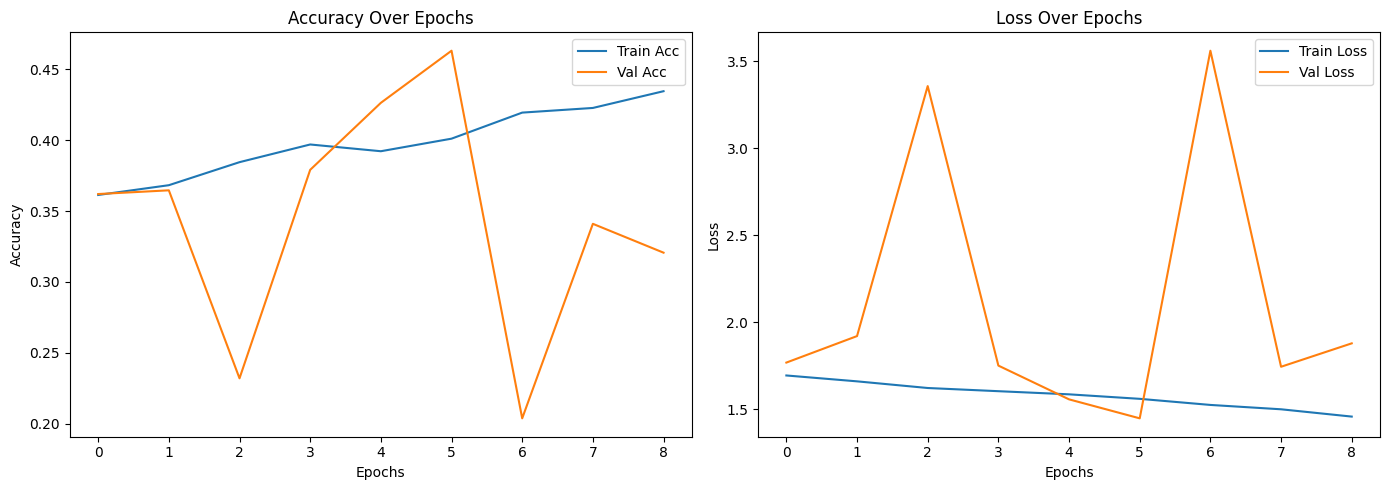

In [ ]:
#  Plot learning curve
def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Over Epochs')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


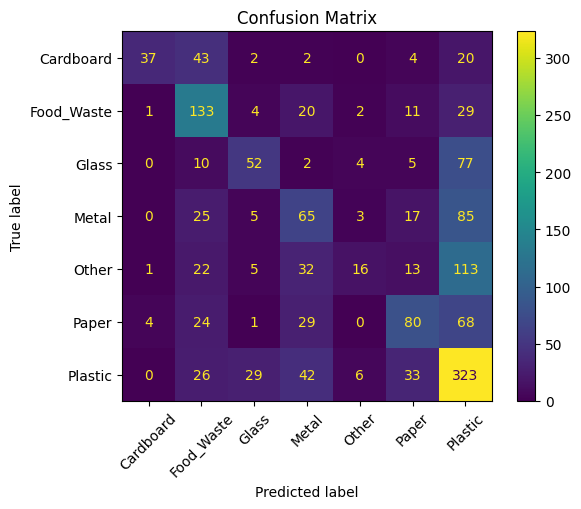

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_cat, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the Generator on the Training Set
datagen.fit(X_train)

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data

Total Classes: 7
Image Format: RGB (.png format)
Image Dimensions (raw): Varied → Resized to (64, 64, 3) for uniformity.
 Issue: Classes like Plastic and Cardboard dominate the dataset, while Other and Food_Waste are underrepresented.
 Encoding: Labels were encoded from string → integer → one-hot vectors.

Normalization: Pixel values scaled between 0 and 1 for stable learning.





* Report model training results

Without balancing or augmentation:

Validation accuracy was stuck between 23–30%

Model showed signs of overfitting

After applying:

Class weights

Image augmentation

Accuracy improved to 46.3%

